La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp3` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.


# (TP) Démodulation

Nous allons maintenant réaliser la démodulation d'un signal modulé en amplitude, c'est-à-dire l'obtention du signal modulé (avec une valeur moyenne supplémentaire). On veut donc passer de :

$$
V_E(t) = A (1 + m \sin \omega_m t) \sin \omega_p t
$$

à

$$
s(t) = s_m \sin \omega_m t + s_0
$$

````{margin}
Si le signal de sortie n'a pas l'amplitude du signal modulant en entrée, ce n'est pas un problème.
````

On reprend les caractéristiques précédentes :
* $f_m = 100Hz$
* $f_p = 10kHz$
* On prendra les amplitudes les plus fortes possibles et on les diminuera si l'ALI sature.

````{important}
On simulera le signal modulé en amplitude directement grâce au GBF pour des raisons de temps et de place. Si le temps le permetn vous pourrez recréer le montage de la précédente séance et tester votre étage de démodulation sur ce signal.
````

## Détection d'enveloppe.

### Etude de la cellule RC (1h30)
L'étude préliminaire a montré que lorsque la diode est bloqué, le condensateur est en régime libre. Nous allons donc étudier ce régime libre séparément de la diode. Ce sera l'occasion d'étudier un régime transitoire.

On étudie un circuit RC série avec $R = 1 k\Omega$ et $C = 1 \mu F$. On réalise le [montage suivant](rc_libre). Le basculement de l'interrupteur permettra de charge et décharger l'interrupteur.

```{figure} ./images/rc_libre.jpg
:name: rc_libre
:align: center
Etude d'un circuit RC.
```

#### Acquisition unique
````{admonition} Etude avec FOXY
:class: tip
1. Réaliser le montage et brancher la console FOXY. 
2. Le régime étant unique, il est __impératif de bien régler les paramètres d'acquisition (durée et synchronisation notamment). Régler les paramètres d'acquisition pour observer le régime libre quand on basculera l'interrupteur (il y a un onglet `Mesure` dans le menu de la voie d'acquisition qui montre la valeur actuelle de la tension, cette information peut-être utile pour les réglage de synchronisation.)
3. Obtenir une estimation du temps caractéristique de trois manières :
	* Ordonnée à l'origine
	* Temps de réponse à 63%
	* Modélisation de l'exponentielle (chercher dans les menus)
4. Pour les deux premières méthodes, on estimera l'incertitude sur $\tau$ et on s'en servira pour comparer les deux valeurs entre elle et avec la valeur attendue (par les données constructeurs).
5. Rendre compte de vos observations dans votre compte-rendu.
````

````{admonition} Etude avec l'oscilloscope
:class: tip
Le mode `SINGLE` de l'oscilloscope permet de réaliser une acquisition unique (l'oscilloscope fige l'écran après l'acquisition).
1. Cette fois, le réglage de la synchronisation sur l'oscilloscope est obligatoire avant d'enclencher le mode single. Pensez à charger le condensateur avnt de déclencher le mode single.
2. Une fois les réglages faits, activer le mode single et lancer la décharge. Estimer le temps caractéristique tau (on ne demande pas de calcul d'incertitude car la mesure est très imprécise, on vérifiera simplement que l'ordre de grandeur est correct).
3. Rendre compte de vos observations dans votre compte-rendu.
````

#### Charges et décharges successives
On peut s'affranchir du mode `SINGLE` en chargeant et déchargeant périodique C. Remplacer la pile et l'interrupteur par un GBF qu'on règlera sur un créneau entre 0 et 5V.

````{admonition} Etude avec l'oscilloscope
:class: tip
1. Réfléchir à la fréquence à choisir pour observer les charges et décharges complète (tout en mesurant $\tau$). Régler le GBF puis observer la tension aux bornes du condensateur. Vérifier sommairement que le temps caractéristique est toujours correct.
2. On veut maintenant observer l'intensité dans le circuit au moyen de l'oscilloscope. Pourquoi le brancher sur la résistance sans rien modifier d'autre dans le circuit précédent ne fonctionne pas ? Proposer un montage permettant d'observer $Ri(t)$ (on ne demande pas l'utilisation d'un transformateur). Observer la discontinuité d'intensité.
3. Rendre compte de vos observations dans votre compte-rendu.
````

### Etude de la détection d'enveloppe. (30 minutes)
````{admonition} Détection d'enveloppe
:class: tip
1. Régler le GBF pour qu'il délivre le signal modulé en amplitude et choisir des valeurs de R et C réalisant la condition établie dans l'étude préliminaire.
2. Observer le signal de sortie et le signal modulé en amplitude. Ajuster les valeurs de R et C pour bien observer uniquement l'enveloppe.
3. Modifier le taux de modulation pour observer le phénomène de surmodulation
4. Rendre compte de vos observations dans votre compte-rendu
````

## Détection synchrone

### Etude du filtre (1h30)
On prend $R = 1k \Omega$. Proposer une valeur de $C$ cohérente avec l'étude préliminaire et réaliser le filtre actif choisi dans l'étude préliminaire.
__N'oubliez pas d'alimenter l'ALI avec l'alimentation symétrique.__

````{admonition} Etude du filtre
:class: tip
1. Vérifier rapidement que le filtre est un filtre passe-bas.
2. On veut tracer le diagramme de Bode en phase et en gain du filtre. Choisir les fréquences du signal de sorte qu'elles soient réparties régulièrement sur 4 décades autour de la fréquence de coupure. On pourra s'aider d'un papier semi-log pour faire le choix des fréquences. On demande une vingtaine de mesures.
3. Réfléchir à la méthode pour mesurer le gain et la phase du filtre. Réaliser les branchement nécessaire (on fera les mesure à l'oscilloscope) et mesurer le gain et la phase du filtre pour les fréquences choisies. __On n'oubliera pas les incertitudes de mesures pour les grandeurs choisies.__

```{margin}
La méthode de mesure du déphasage ainsi obtenue est à retenir.
```
````

La cellule ci-dessous va vous permettre de calculer les incertitudes sur le gain et la phase avant de tracer le diagramme de Bode.

/home/ubuntu/miniconda3/envs/prepa/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ubuntu/miniconda3/envs/prepa/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ubuntu/miniconda3/envs/prepa/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/miniconda3/envs/prepa/lib/python3.9/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/ubuntu/miniconda3/envs/prepa/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: float() argument must be a string or a number, not 'Figure'

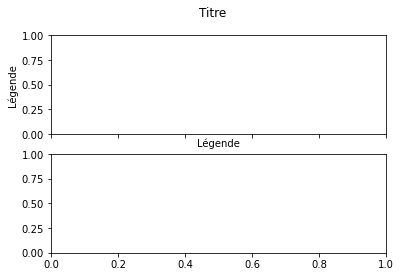

In [1]:
"""Importation des bibliothèques utiles"""
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

"""Entrer les mesures des mesurandes directes ainsi que leurs incertitudes. 
S'il y a plusieurs sources, entrer un vecteur par source et les sommer.
"""

freqs = np.array([])  # Fréquences. On pourra considérer qu'il n'y a pas d'incertitude sur les fréquences.
k = len(freqs)  # Nombre de mesures réalisées.


"""Entrez les valeurs des mesures et incertitudes"""
ue_m = np.array([])
ue_u1 = np.array([])
ue_u2 = np.array([])

us_m = np.array([])
us_u1 = np.array([])
us_u2 = np.array([])

deltat_m = np.array([])
deltat_u1 = np.array([])
deltat_u2 = np.array([])

"""Grandeurs simulées"""
N = 1000000
ue_sim = ue_m + rd.uniform(-ue_u1, ue_u1, (N, k))
us_sim = us_m + rd.uniform(-us_u1, us_u1, (N, k))
deltat_sim = deltat_m + rd.uniform(-deltat_u1, deltat_u1, (N, k))

""" Il faut aussi créer des vecteurs pour les incertitudes.
A vous de créer les simulation des grandeurs utiles à partir de chaque mesurande directe ue, us, deltat.
Vous devez avoir des vecteurs de taille k.
Le log décimal est la fonction np.log10()
"""
phi_sim = np.array([])
g_sim = np.array([])
gdb_sim = np.array([])





"""
- Prendre la moyenne des gains en décibel et des phases pour obtenir les grandeurs mesurées.
On rappelle la formule pour des moyennes uniquement par colonne :
np.mean(gb_sim, axis=0)

- Prendre l'écart-type des gains en décibel et des phases pour obtenir les incertitudes de mesures.
On rappelle la formule pour des écart-type uniquement par colonne :
np.std(gb_sim, ddof=1, axis=0)
"""
phi_m = np.mean(phi_sim, axis=0)
gdb_m = np.mean(gdb_sim, axis=0)
phi_u = np.std(phi_sim, ddof=1, axis=0)
gdb_u = np.std(gdb_sim, ddof=1, axis=0)






"""
Tracer le diagramme de Bode en gain et en phase du filtre.
Il n'est pas utile de calculer log(f). Pour passer en échelle des abscisses logarithmiques,
on utilisera la fonction :
ax.set_xscale("log")
(si la zone de tracé s'appelle ax)

- Pensez à légender vos deux graphiques.
- Utiliser f.savefig("nom_dufichier.png") pour sauvegarder la figure f et l'intégrer dans votre compte-rendu.
"""
f, ax = plt.subplots(2, 1, sharex='col')  # Forcer la même abscisse
f.suptitle("Titre")
ax[0].set_xlabel("Légende")
ax[0].set_ylabel("Légende")
ax[0].errorbar(f, gdb_m, yerr=gdb_u, label="Légende", linestyle="")
ax[0].legend()
ax[0].grid()
ax[0].set_xscale("log")

ax[1].set_xlabel("Légende")
ax[1].set_ylabel("Légende")
ax[1].errorbar(freqs, phi_m, yerr=phi_u, label="Légende", linestyle="")
ax[1].legend()
ax[1].grid()
ax[1].set_xscale("log")

f.tight_layout()  # Amélioration de l'apparence
plt.show()



````{admonition} Analyse du diagramme de Bode
:class: tip
Vous devez analyser le diagramme de Bode.
1. Commencer par se demander quelles sont toutes les caractéristiques théoriques qu'on attend de ce filtre après l'étude préliminaire.
2. Vérifier sommairement la cohérence entre les résultats expérimentaux et les expressions théoriques (on ne demande pas un calcul d'écart normalisé car un écart pas trop important n'empếchera pas le filtre de faire ce qu'on lui demande).
````

### Montage de détection synchrone. (30 minutes)

````{admonition} Réalisation du montage
:class: tip
1. Proposer une succession de montage permettant de réaliser une détection synchrone à partir de deux signaux, l'un modulé en amplitude, l'autre sinusoïdal de fréquence $f_p$. Le filtre ayant été testé précédemment, il n'est pas nécessaire d'étudier l'autre étage (déjà étudié dans un TP précédent). On ne réalisera pas le filtre passe-bas.
2. Réaliser alors le montage complet et vérifier qu'on réalise la démodulation à l'oscilloscope. On pourra ajuster les valeurs de R et C du filtre si nécessaire.
3. Vérifier que la détection synchrone fonctionne encore quand il y a surmodulation
4. Réaliser l'acquisition sur FOXY et vérifier que le spectre du signal ne contient bien qu'une seule fréquence.
5. Rendre compte de votre manipulation et de vos observations.

````

````{admonition} Compte-rendu
:class: tip
Rendre-compte :
1. De l'étude de la cellule RC et de son utilisation dans la démodulation
2. Du principe de la détection synchrone, de l'étude du filtre utilisé puis de la mise en place de la détection synchrone.
````